In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 
import numpy as np

In [8]:
from scrinet import fits

In [238]:
# np.savetxt("psf_x.txt", psf_coords)

In [228]:
# psf_y = np.array([psf_data[k] for k in psf_data.keys()]).T

In [235]:
# np.savetxt("psf_y.txt", psf_y)

In [2]:
psf_coords = np.loadtxt("psf_x.txt")

In [3]:
psf_y = np.loadtxt("psf_y.txt")

In [5]:
psf_coords.shape

(37, 3)

In [4]:
psf_y.shape

(37, 5)

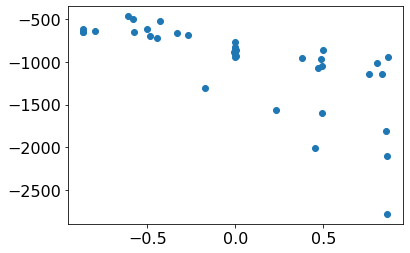

In [141]:
plt.figure()
plt.scatter(psf_coords[:,1], psf_y[:,0])

In [7]:
psf_coords[0]

array([ 0.1600004 , -0.00686666,  0.79998044])

In [30]:
psf_y.shape

(37, 5)

In [121]:
X = psf_coords.copy()
y = psf_y.copy()[:,0]

In [122]:
X.shape

(37, 3)

In [123]:
y.shape

(37,)

In [354]:
# note this is an old functiona and should be replaced with the new one
scale = True
if scale:
    X, y = fits.scale.scale_data(X, y)

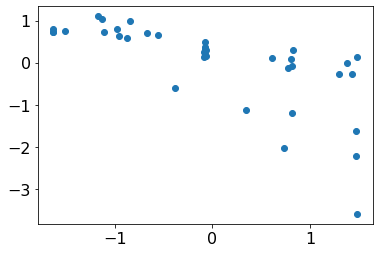

In [355]:
plt.figure()
plt.scatter(X[:,1], y)

In [356]:
max_degs = fits.poly.generate_degrees([3,3,3], max_deg_total=3*3)

In [357]:
len(max_degs)

64

In [358]:
for i, deg in enumerate(max_degs):
    print(f"{i}, {deg}")

0, [0 0 0]
1, [0 0 1]
2, [0 0 2]
3, [0 0 3]
4, [1 0 0]
5, [1 0 1]
6, [1 0 2]
7, [1 0 3]
8, [2 0 0]
9, [2 0 1]
10, [2 0 2]
11, [2 0 3]
12, [3 0 0]
13, [3 0 1]
14, [3 0 2]
15, [3 0 3]
16, [0 1 0]
17, [0 1 1]
18, [0 1 2]
19, [0 1 3]
20, [1 1 0]
21, [1 1 1]
22, [1 1 2]
23, [1 1 3]
24, [2 1 0]
25, [2 1 1]
26, [2 1 2]
27, [2 1 3]
28, [3 1 0]
29, [3 1 1]
30, [3 1 2]
31, [3 1 3]
32, [0 2 0]
33, [0 2 1]
34, [0 2 2]
35, [0 2 3]
36, [1 2 0]
37, [1 2 1]
38, [1 2 2]
39, [1 2 3]
40, [2 2 0]
41, [2 2 1]
42, [2 2 2]
43, [2 2 3]
44, [3 2 0]
45, [3 2 1]
46, [3 2 2]
47, [3 2 3]
48, [0 3 0]
49, [0 3 1]
50, [0 3 2]
51, [0 3 3]
52, [1 3 0]
53, [1 3 1]
54, [1 3 2]
55, [1 3 3]
56, [2 3 0]
57, [2 3 1]
58, [2 3 2]
59, [2 3 3]
60, [3 3 0]
61, [3 3 1]
62, [3 3 2]
63, [3 3 3]


In [359]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False)

In [360]:
np.array(t_AICs).argmin()

27

In [361]:
np.array(t_AICcs).argmin()

29

In [362]:
np.array(t_BICs).argmin()

29

In [363]:
lowest_deg_t

27

In [364]:
best_deg_idx

27

In [365]:
max_degs[best_deg_idx]

array([2, 1, 3])

(1.0, 142.93152210784788)

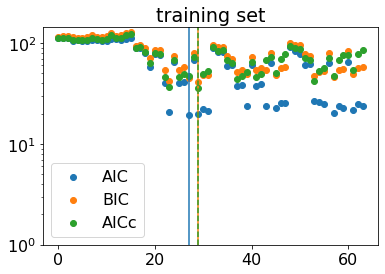

In [366]:
plt.figure()
plt.scatter(range(len(t_AICs)), t_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), t_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), t_AICcs, label='AICc')

plt.axvline(np.argmin(t_AICs), c='C0')
plt.axvline(np.argmin(t_BICs), c='C1')
plt.axvline(np.argmin(t_AICcs), ls='--', c='C2')

plt.legend()
plt.title('training set')

plt.yscale('log')
plt.ylim(1e0)

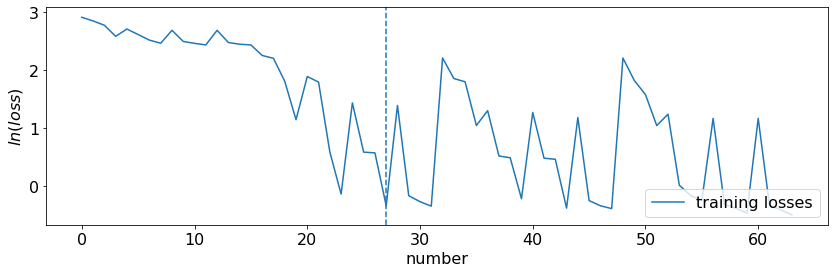

In [367]:
plt.figure(figsize=(14,4))
plt.plot(range(len(t_AICs)), np.log(t_losses), label='training losses')
plt.legend(loc='lower right')
plt.xlabel('number')
plt.ylabel(r'$ln(loss)$')

plt.axvline(lowest_deg_t, c='C0', ls='--')

In [368]:
tloss = best_lr.loss(X, y, method='sum-of-squares')

In [369]:
tloss

0.7115209817405788

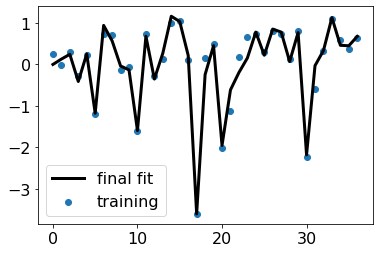

In [370]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), best_lr.predict(X), lw=3, c='k', label='final fit')
plt.legend()

# main function

In [406]:
np.where(t_AICs == np.sort(t_AICs)[-5])[0][0]

14

In [407]:
np.where(t_AICs == np.sort(t_AICs)[-5])

(array([14]),)

In [402]:
np.sort(t_AICs)[-5]

110.70380242949487

In [593]:
def fit(X, y, title, maxdeg=3, scaleX=False, scaleY=False):
    
    if scaleX:
        X = X.copy()
        X_scalers = fits.scale.make_scalers(X)
        X = fits.scale.apply_scaler(X, X_scalers)
#         self.save_X_scalers(os.path.join(self.outdir, "X_scalers"))
    if scaleY:
        y = y.copy()
        Y_scalers = fits.scale.make_scalers(y)
        y = fits.scale.apply_scaler(y, Y_scalers)
#         save_Y_scalers(os.path.join(self.outdir, "Y_scalers"))  


    max_degs = fits.poly.generate_degrees([maxdeg, maxdeg, 2], max_deg_total=3*3)
    best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
        fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False, method='RMSE')

#     best_lr = fits.poly.LinearPolynomialBasisRegression()
#     best_lr.fit(X, y, maxdegs=[2,2,2])

#     print(f"best degs: {max_degs[best_deg_idx]}")
    
#     if scaleX:
#         X = fits.scale.apply_scaler(X, X_scalers)

    print(f"degs: {best_lr.degrees}")

    yhat = best_lr.predict(X)

    if scaleY:
        y = fits.scale.apply_inverse_scaler(y, Y_scalers)
        yhat = fits.scale.apply_inverse_scaler(yhat, Y_scalers)

    if scaleX:
        X = fits.scale.apply_inverse_scaler(X, X_scalers)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    labels = ['eta', 'cos(theta)', 'chi']
    fig.suptitle(title)
    for i in range(len(labels)):

        axes[i].scatter(X[:,i], y, label='training')
        axes[i].scatter(X[:,i], yhat, label='final fit')
        axes[i].set_xlabel(labels[i])
    axes[0].legend()
    axes[3].scatter(range(len(y)), 100*(y-yhat)/y)
    axes[3].set_title('% difference')
        
    plt.show()
    plt.close()
    
    return best_lr

In [594]:
X[:,1]

array([-6.86665637e-03,  8.05327355e-01,  6.11707978e-03,  7.60655682e-01,
       -1.80827695e-04,  4.93752282e-01, -7.96287068e-01, -3.30999947e-01,
        4.72087009e-01,  4.92715221e-01,  8.58323669e-01, -5.76191041e-01,
        8.35069297e-01,  3.81258462e-01, -4.27339816e-01, -5.82720129e-01,
        4.88244437e-01,  8.62409231e-01, -2.89005061e-03, -7.03956819e-04,
        4.49904477e-01,  2.30806812e-01,  3.96115554e-03, -2.69286667e-01,
       -8.64292215e-01,  4.97416933e-01, -8.64231942e-01, -8.64292215e-01,
        8.65455397e-01, -4.99958686e-01,  8.60074467e-01, -1.70065051e-01,
       -5.14869609e-04, -6.09487866e-01, -4.45222104e-01, -2.02830653e-03,
       -4.86476032e-01])

In [595]:
X = psf_coords.copy()
y = psf_y.copy()[:,0]

degs: [[0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 1], [2, 0, 0], [2, 0, 1], [3, 0, 0], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1], [2, 1, 0]]


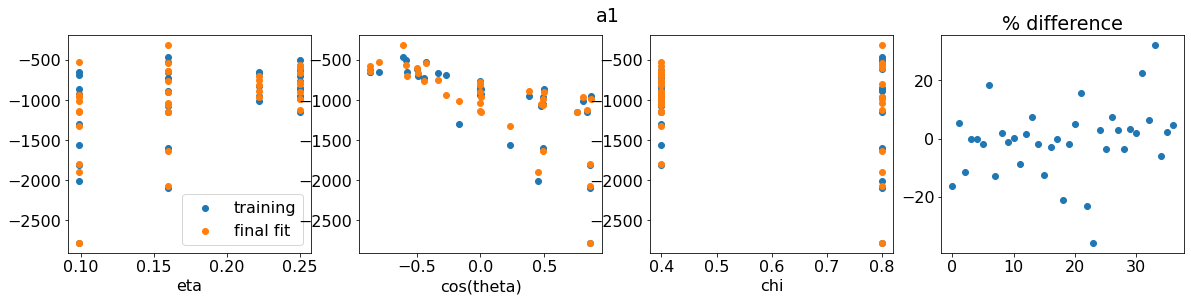

degs: [[0, 0, 0], [0, 1, 0]]


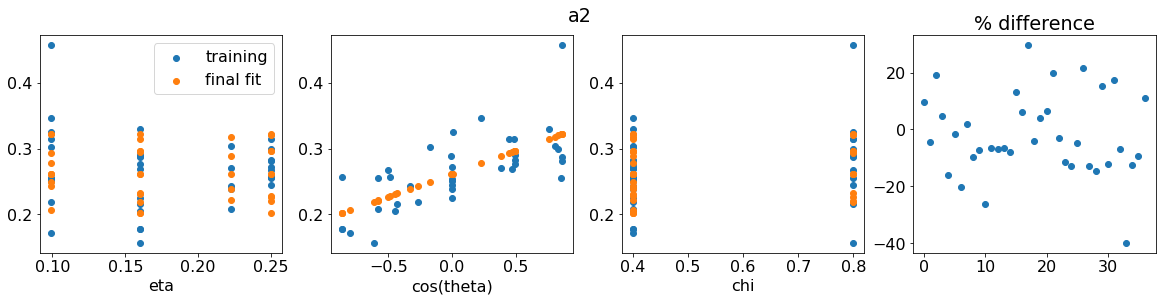

degs: [[0, 0, 0], [0, 1, 0], [0, 2, 0]]


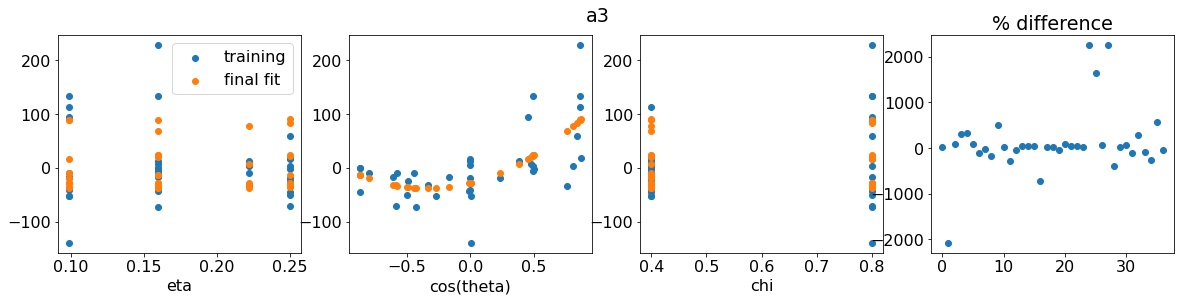

degs: [[0, 0, 0]]


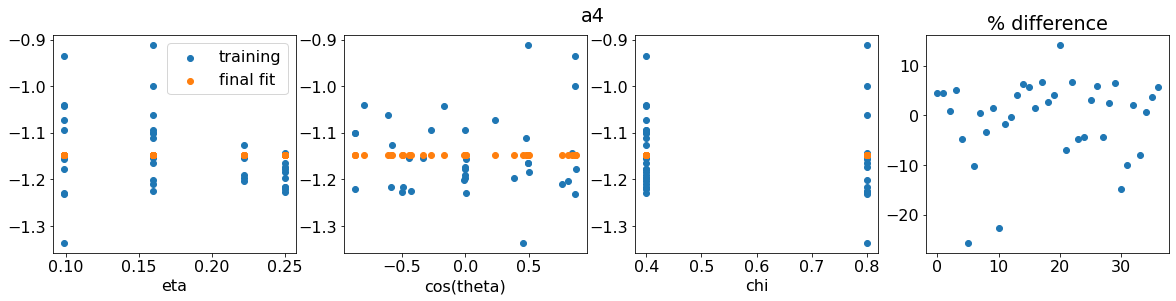

degs: [[0, 0, 0], [0, 0, 1], [1, 0, 0]]


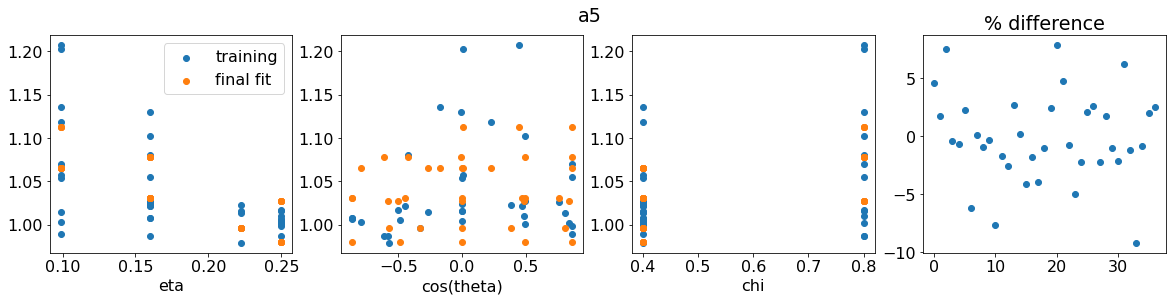

In [596]:
y_fits = []
maxdegs=[3,4,4,4,4]
suptitles = ['a1', 'a2', 'a3', 'a4', 'a5']
for i in range(psf_y.shape[1]):
    y_fits.append(fit(psf_coords, psf_y[:,i].reshape(-1,1), title=suptitles[i], maxdeg=maxdegs[i], scaleX=True, scaleY=True))

In [591]:
for yf in y_fits:
    print(yf.w_ml)

[[ 5.70903101e+03]
 [ 3.55505384e+03]
 [-5.70877120e+03]
 [ 3.30309708e-01]
 [-2.16249926e-01]
 [-6.99064056e-02]
 [-6.98702317e-01]
 [-3.20702618e-01]
 [ 3.51805722e-01]
 [-1.18513686e-01]]
[[ 3.09999755e+04]
 [ 1.93056833e+04]
 [-3.10002407e+04]
 [-1.45179743e-01]
 [-1.58386170e+00]
 [ 4.56493080e-01]
 [ 6.44784782e-01]
 [ 5.75175490e-02]
 [-2.21419359e-01]
 [-1.24294758e-01]]
[[-3.07998431e+04]
 [-1.91806103e+04]
 [ 3.07997563e+04]
 [ 9.43339941e-02]
 [ 1.51351307e+00]
 [-3.63422376e-01]
 [ 6.30140956e-01]
 [ 5.19397621e-01]
 [-2.59772056e-01]
 [ 2.86759454e-01]]
[[ 2.11473975e+04]
 [ 1.31694356e+04]
 [-2.11472227e+04]
 [-4.13981093e-01]
 [-6.28868959e-01]
 [-3.36804864e-01]
 [ 9.90136696e-02]
 [ 8.02593702e-02]
 [ 6.73324491e-02]
 [ 1.88251767e-01]]
[[ 8.03795430e+03]
 [ 5.00590082e+03]
 [-8.03769201e+03]
 [-5.66010726e-01]
 [-7.19464877e-01]
 [ 1.76724421e-01]
 [ 3.20187310e-02]
 [ 5.67512328e-02]
 [ 5.70716199e-02]
 [-4.05257837e-01]]


In [592]:
y_fits[1].degrees

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [1, 0, 0],
 [1, 0, 1],
 [2, 0, 0],
 [0, 1, 0],
 [0, 1, 1],
 [1, 1, 0],
 [0, 2, 0]]